In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
from PIL import Image
from IPython.display import display
import warnings
from sklearn.preprocessing import normalize
warnings.filterwarnings('ignore')

In [27]:
##List out the file names of CAT and DOG folder
        
dogpath="../CATS_DOGS/DOG"

dog_list=[]

for folder,subfolder, files in os.walk(dogpath):
    for file in files:
        dog_list.append(folder+"/"+file)

        

In [28]:
##Select images which fits our image size needs

dogim_sizes=[]
dog_rejected=[]
selected_dogfiles=[]
for item in dog_list:
    try:
        with Image.open(item) as im:
           
           
            if (im.size[0]>=323 and im.size[1]>=302 and len(im.mode)==3):
                dogim_sizes.append(im.size)
                selected_dogfiles.append(item)
    except:
        dog_rejected.append(im)

In [29]:
##checking the image size statistics
print(pd.DataFrame(dogim_sizes).describe())


                 0            1
count  8342.000000  8342.000000
mean    459.131263   408.927116
std      57.377488    60.372905
min     323.000000   302.000000
25%     411.000000   375.000000
50%     500.000000   375.000000
75%     500.000000   480.000000
max     500.000000   500.000000


In [30]:
#do the center crop transformation
transform=transforms.Compose([transforms.CenterCrop(224),transforms.Grayscale()])

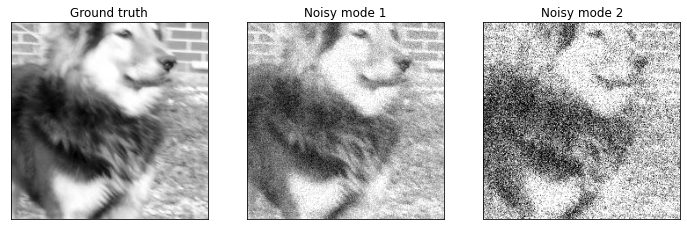

In [36]:
##transform the ground truth images and make the noisy image

for item in selected_dogfiles:
    
    gt=Image.open(item)

    gt=np.array(transform(gt))


    gt1=Image.fromarray(gt)
    gt1.save("../dogData_20/gt/"+os.path.basename(item))
    noisy=gt+np.random.normal(0,20,(224,224))

    noisy=np.clip(noisy,0,255).astype(np.uint8)

    noisy=Image.fromarray(noisy)
    noisy.save("../dogData_20/noise/"+os.path.basename(item))

fig, ax=plt.subplots(1,3,figsize=(12,8))
ax[0].imshow(gt,cmap="gray")
ax[1].imshow(noisy,cmap="gray")

ax[1].set_title("Noisy mode 1")
ax[0].set_title("Ground truth")


    
##create second set of images with different noise variance
for item in selected_dogfiles:
    
    gt=Image.open(item)

    gt=np.array(transform(gt))


    gt1=Image.fromarray(gt)
    gt1.save("../dogData_60/gt/"+os.path.basename(item))
    noisy=gt+np.random.normal(10,60,(224,224))

    noisy=np.clip(noisy,0,255).astype(np.uint8)

    noisy=Image.fromarray(noisy)
    noisy.save("../dogData_60/noise/"+os.path.basename(item))   


                


ax[2].imshow(noisy,cmap="gray")

ax[2].set_title("Noisy mode 2")


for a in ax:
    a.set_xticks([])
    a.set_yticks([])